### Listing 3.12 Loading the Reuters dataset

In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data.shape

(8982,)

In [6]:
test_data.shape

(2246,)

In [7]:
train_labels.shape

(8982,)

In [8]:
test_labels.shape

(2246,)

### Listing 3.13 Decoding newswires back to text

In [9]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [10]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

### Listing 3.14 Encoding the data

In [11]:
import numpy as np

In [12]:
def vectorise_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorise_sequences(train_data)
x_test = vectorise_sequences(test_data)

In [13]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

#### Easier way using built-in method in Keras

In [14]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### Listing 3.15 Model definition

In [15]:
from keras import models
from keras import layers

In [16]:
model = models.Sequential()

In [17]:
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

### Listing 3.16 Compiling the model

In [18]:
model.compile(optimizer='rmsprop', 
             loss='categorical_crossentropy',
             metrics=['accuracy'])

### Listing 3.17 Setting aside a validation set

In [19]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### Listing 3.18 Training the model

In [20]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 5s 587us/step - loss: 2.5200 - acc: 0.4970 - val_loss: 1.7174 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 2s 190us/step - loss: 1.4444 - acc: 0.6888 - val_loss: 1.3470 - val_acc: 0.7080
Epoch 3/20
7982/7982 [==============================] - 1s 106us/step - loss: 1.0948 - acc: 0.7638 - val_loss: 1.1699 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 84us/step - loss: 0.8684 - acc: 0.8173 - val_loss: 1.0829 - val_acc: 0.7570
Epoch 5/20
7982/7982 [==============================] - 1s 89us/step - loss: 0.7019 - acc: 0.8485 - val_loss: 0.9848 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 106us/step - loss: 0.5654 - acc: 0.8800 - val_loss: 0.9398 - val_acc: 0.8010
Epoch 7/20
7982/7982 [==============================] - 1s 109us/step - loss: 0.4583 - acc: 0.9050 - val_loss: 0.9087 - val_acc: 0.8050
Ep

### Listing 3.19 Plotting the training and validation loss

In [21]:
import matplotlib.pyplot as plt

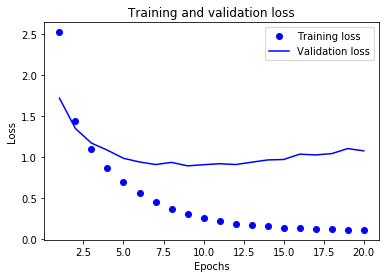

In [22]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Listing 3.20 Plotting the training and validation accuracy

In [23]:
plt.clf()

<Figure size 432x288 with 0 Axes>

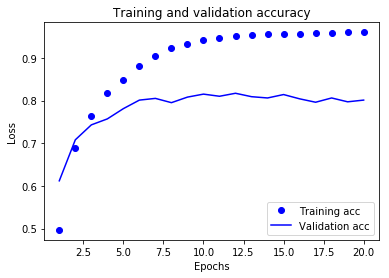

In [24]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Retraining a model from scratch

In [32]:
model = models.Sequential()

In [33]:
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', 
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 176us/step - loss: 2.7118 - acc: 0.5024 - val_loss: 1.7955 - val_acc: 0.6420
Epoch 2/8
7982/7982 [==============================] - 1s 110us/step - loss: 1.4435 - acc: 0.7042 - val_loss: 1.3166 - val_acc: 0.7160
Epoch 3/8
7982/7982 [==============================] - 1s 89us/step - loss: 1.0484 - acc: 0.7750 - val_loss: 1.1417 - val_acc: 0.7510
Epoch 4/8
7982/7982 [==============================] - 1s 73us/step - loss: 0.8157 - acc: 0.8242 - val_loss: 1.0459 - val_acc: 0.7730
Epoch 5/8
7982/7982 [==============================] - 1s 97us/step - loss: 0.6480 - acc: 0.8634 - val_loss: 0.9874 - val_acc: 0.7930
Epoch 6/8
7982/7982 [==============================] - 1s 87us/step - loss: 0.5142 - acc: 0.8958 - val_loss: 0.9414 - val_acc: 0.8020
Epoch 7/8
7982/7982 [==============================] - 1s 92us/step - loss: 0.4151 - acc: 0.9166 - val_loss: 0.9396 - val_acc: 0.7990
Epoch 8/8
22

In [34]:
results

[0.9673623501564494, 0.7889581478448818]

### Listing 3.22 Generating predictions for new data

In [35]:
predictions = model.predict(x_test)

In [36]:
predictions[0].shape

(46,)

In [37]:
np.sum(predictions[0])

0.99999994

In [38]:
np.argmax(predictions[0])

3